In [3]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle_zillow


from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

In [27]:
### Data Dictionary

|Index | Column Name | Description | Row Count 
|---|---|---|---|
|0 |  parcelid                      | Unique identifier for parcels (lots)                                                 |69519
|1 |  bathroomcnt                   | Number of bathrooms in home including fractional bathrooms                           |69519
|2 |  bedroomcnt                    | Number of bedrooms in home                                                           |69519
|3 |  calculatedfinishedsquarefeet  | Calculated total finished living area of the home                                    |69519
|4 |  fips                          | Federal Information Processing Standard code                                         |69519
|5 |  latitude                      | Latitude of the middle of the parcel multiplied by 10e6                              |69519
|6 |  longitude                     | Longitude of the middle of the parcel multiplied by 10e6                             |69519
|7 |  lotsizesquarefeet             | Area of the lot in square feet                                                       |69519
|8 |  rawcensustractandblock        | Census tract and block ID combined - also contains blockgroup assignment by extension|69519
|9 |  regionidcity                  | City in which the property is located (if any)                                       |69519
|10|  regionidcounty                | County in which the property is located                                              |69519
|11|  regionidzip                   | Zip code in which the property is located                                            |69519
|12|  roomcnt                       | Total number of rooms in the principal residence                                     |69519
|13|  yearbuilt                     | The Year the principal residence was built                                           |69519
|14|  structuretaxvaluedollarcnt    | The assessed value of the built structure on the parcel                              |69519
|15|  taxvaluedollarcnt             | The total tax assessed value of the parcel                                           |69519
|16|  assessmentyear                | The year of the property tax assessment                                              |69519
|17|  landtaxvaluedollarcnt         | The assessed value of the land area of the parcel                                    |69519
|18|  taxamount                     | The total property tax assessed for that assessment year                             |69519
|19|  censustractandblock           | Census tract and block ID combined - also contains blockgroup assignment by extension|69519
|20|  logerror                      |log(zestimate) - log(sale price)                                                      |69519
|21|  transactiondate               |Transaction date for the property                                                     |69519
|22|  county 

SyntaxError: invalid syntax (1164705565.py, line 3)

# Exercises

# Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

# 1.Clustering with the Iris Dataset

# Using this lesson as a guide, perform clustering on the iris dataset.

- a. Choose features other than the ones used in the lesson.
- b. Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.

In [5]:
# Loading the data
iris = data('iris')

# Renaming the columns
iris = iris.rename(columns={'Sepal.Length': 'sepal_length', 'Petal.Length': 'petal_length', 'Sepal.Width': 'sepal_width', 'Petal.Width': 'petal_width', 'Species': 'species'})

In [6]:
# showing head
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [9]:
# Using sepal_width and petal_width 
X = iris[['sepal_width', 'petal_width']]

In [11]:
# defining scaler and fiting
scaler = MinMaxScaler().fit(X)
# Transforming
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [12]:
X_scaled.head()

,sepal_width,petal_width
1,0.625000,0.041667
2,0.416667,0.041667
3,0.500000,0.041667
4,0.458333,0.041667
5,0.666667,0.041667


In [13]:
# Using sklearn to define KMeans

#define the kmeans
kmeans = KMeans(n_clusters=3, random_state=123)

# fit the data
kmeans.fit(X_scaled)

# predicting with kmeans 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
# adding a new column names cluster in iris and X_scaled DataFrame

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [16]:
X_scaled.head()

,sepal_width,petal_width,cluster
1,0.625000,0.041667,1
2,0.416667,0.041667,1
3,0.500000,0.041667,1
4,0.458333,0.041667,1
5,0.666667,0.041667,1


In [17]:
iris.groupby('cluster')

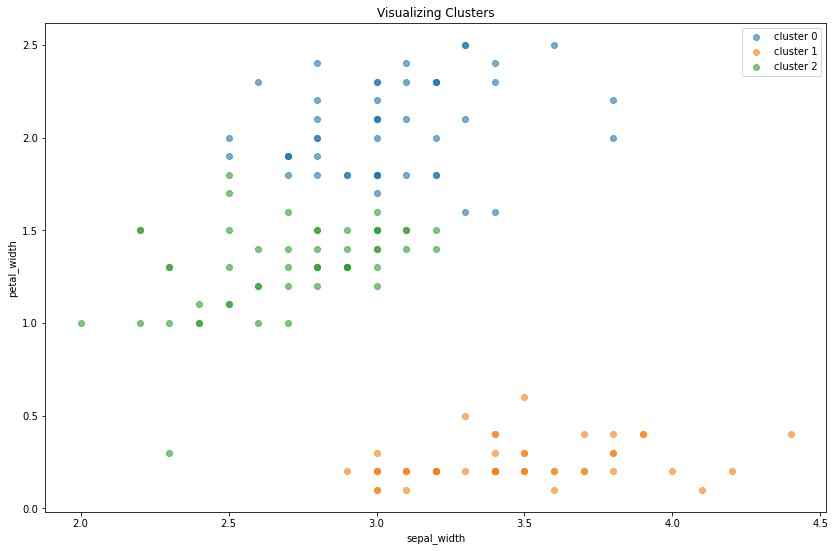

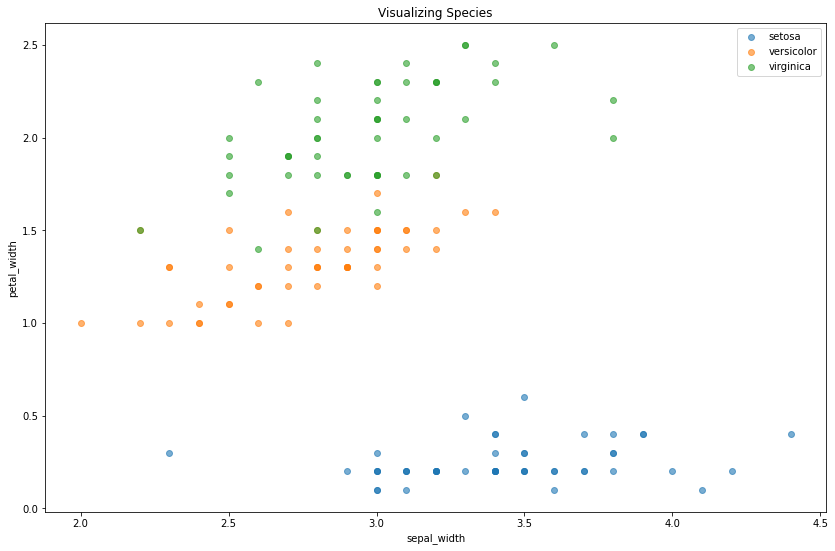

In [23]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=str(cluster), alpha=.6)
# centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Species')
plt.show()

In [24]:
kmeans.cluster_centers_

array([[0.43402778, 0.81336806],
       [0.60459184, 0.06037415],
       [0.29481132, 0.50393082]])

In [25]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,0.434028,0.813368
1,0.604592,0.060374
2,0.294811,0.503931


In [26]:
iris.groupby('cluster')['petal_width', 'sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

# 3. How does scaling impact the results of clustering?

# Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.